In [1]:
import xml.etree.ElementTree as ET

# 네임스페이스 등록
namespaces = {'PDBx': 'http://pdbml.pdb.org/schema/pdbx-v50.xsd'}

# XML 파일 열기
tree = ET.parse("C:/Users/kbjoo/Downloads/4hhb.xml")
root = tree.getroot()

# 예: atom_site 항목 하나씩 순회
for atom_site in root.findall('.//PDBx:atom_site', namespaces):
    atom_id = atom_site.attrib.get('id')
    atom_name = atom_site.find('PDBx:auth_atom_id', namespaces).text
    res_name = atom_site.find('PDBx:auth_comp_id', namespaces).text
    x = atom_site.find('PDBx:Cartn_x', namespaces).text
    y = atom_site.find('PDBx:Cartn_y', namespaces).text
    z = atom_site.find('PDBx:Cartn_z', namespaces).text

    auth_asym_id = atom_site.find('PDBx:auth_asym_id', namespaces).text
    auth_seq_id = atom_site.find('PDBx:auth_seq_id', namespaces).text
    pdbx_PDB_model_num = atom_site.find('PDBx:pdbx_PDB_model_num', namespaces).text
    label_entity_id = atom_site.find('PDBx:label_entity_id', namespaces).text

    group_PDB = atom_site.find('PDBx:group_PDB', namespaces).text
    
    print(f'ID: {atom_id}, Atom: {atom_name}, Residue: {res_name}, Coords: ({x}, {y}, {z})')


ID: 1, Atom: N, Residue: VAL, Coords: (19.323, 29.727, 42.781)
ID: 2, Atom: CA, Residue: VAL, Coords: (20.141, 30.469, 42.414)
ID: 3, Atom: C, Residue: VAL, Coords: (21.664, 29.857, 42.548)
ID: 4, Atom: O, Residue: VAL, Coords: (21.985, 29.541, 43.704)
ID: 5, Atom: CB, Residue: VAL, Coords: (19.887, 31.918, 43.524)
ID: 6, Atom: CG1, Residue: VAL, Coords: (20.656, 32.850, 42.999)
ID: 7, Atom: CG2, Residue: VAL, Coords: (18.692, 31.583, 43.506)
ID: 8, Atom: N, Residue: LEU, Coords: (22.284, 30.338, 41.520)
ID: 9, Atom: CA, Residue: LEU, Coords: (23.773, 29.985, 41.873)
ID: 10, Atom: C, Residue: LEU, Coords: (24.698, 31.236, 42.725)
ID: 11, Atom: O, Residue: LEU, Coords: (24.359, 32.232, 42.013)
ID: 12, Atom: CB, Residue: LEU, Coords: (24.180, 29.902, 40.374)
ID: 13, Atom: CG, Residue: LEU, Coords: (24.177, 28.761, 39.582)
ID: 14, Atom: CD1, Residue: LEU, Coords: (24.140, 27.432, 40.098)
ID: 15, Atom: CD2, Residue: LEU, Coords: (24.210, 28.919, 37.923)
ID: 16, Atom: N, Residue: SER, Coord

In [2]:
import pandas as pd

In [3]:
len(root.findall('.//PDBx:atom_site', namespaces))

4779

In [4]:
root.findall('.//PDBx:atom_site', namespaces)[:3]

[<Element '{http://pdbml.pdb.org/schema/pdbx-v50.xsd}atom_site' at 0x000002489C6ED4E0>,
 <Element '{http://pdbml.pdb.org/schema/pdbx-v50.xsd}atom_site' at 0x000002489C6EDB20>,
 <Element '{http://pdbml.pdb.org/schema/pdbx-v50.xsd}atom_site' at 0x000002489C6EE110>]

In [5]:
for atom_site in root.findall('.//PDBx:atom_site', namespaces)[:3]:
    atom_id = atom_site.attrib.get('id')
    atom_name = atom_site.find('PDBx:auth_atom_id', namespaces).text
    res_name = atom_site.find('PDBx:auth_comp_id', namespaces).text
    x = float(atom_site.find('PDBx:Cartn_x', namespaces).text)
    y = float(atom_site.find('PDBx:Cartn_y', namespaces).text)
    z = float(atom_site.find('PDBx:Cartn_z', namespaces).text)
    print(type(atom_id), type(atom_name), type(res_name), type(x), type(y), type(z))

<class 'str'> <class 'str'> <class 'str'> <class 'float'> <class 'float'> <class 'float'>
<class 'str'> <class 'str'> <class 'str'> <class 'float'> <class 'float'> <class 'float'>
<class 'str'> <class 'str'> <class 'str'> <class 'float'> <class 'float'> <class 'float'>


In [6]:
atom_id_list, atom_name_list, res_name_list, x_list, y_list, z_list = [], [], [], [], [], []
auth_asym_id_list, auth_seq_id_list, pdbx_PDB_model_num_list, label_entity_id_list = [], [], [], []
group_PDB_list = []

for atom_site in root.findall('.//PDBx:atom_site', namespaces):
    atom_id = int(atom_site.attrib.get('id'))
    atom_name = atom_site.find('PDBx:auth_atom_id', namespaces).text
    res_name = atom_site.find('PDBx:auth_comp_id', namespaces).text
    x = atom_site.find('PDBx:Cartn_x', namespaces).text
    y = atom_site.find('PDBx:Cartn_y', namespaces).text
    z = atom_site.find('PDBx:Cartn_z', namespaces).text
    

    auth_asym_id = atom_site.find('PDBx:auth_asym_id', namespaces).text
    auth_seq_id = int(atom_site.find('PDBx:auth_seq_id', namespaces).text)
    pdbx_PDB_model_num = int(atom_site.find('PDBx:pdbx_PDB_model_num', namespaces).text)
    label_entity_id = int(atom_site.find('PDBx:label_entity_id', namespaces).text)

    group_PDB = atom_site.find('PDBx:group_PDB', namespaces).text

    atom_id_list.append(atom_id)
    atom_name_list.append(atom_name)
    res_name_list.append(res_name)
    x_list.append(float(x))
    y_list.append(float(y))
    z_list.append(float(z))

    auth_asym_id_list.append(auth_asym_id)
    auth_seq_id_list.append(auth_seq_id)
    pdbx_PDB_model_num_list.append(pdbx_PDB_model_num)
    label_entity_id_list.append(label_entity_id)
    group_PDB_list.append(group_PDB)

# DataFrame 생성
df = pd.DataFrame({
    'atom_id': atom_id_list,
    'atom_name': atom_name_list,
    'res_name': res_name_list,
    'x': x_list,
    'y': y_list,
    'z': z_list,
    'auth_asym_id': auth_asym_id_list,
    'auth_seq_id': auth_seq_id_list,
    'pdbx_PDB_model_num': pdbx_PDB_model_num_list,
    'label_entity_id': label_entity_id_list,
    'group_PDB': group_PDB_list
})

df

,atom_id,atom_name,res_name,x,y,z,auth_asym_id,auth_seq_id,pdbx_PDB_model_num,label_entity_id,group_PDB
0,1,N,VAL,19.323,29.727,42.781,A,1,1,1,ATOM
1,2,CA,VAL,20.141,30.469,42.414,A,1,1,1,ATOM
2,3,C,VAL,21.664,29.857,42.548,A,1,1,1,ATOM
3,4,O,VAL,21.985,29.541,43.704,A,1,1,1,ATOM
4,5,CB,VAL,19.887,31.918,43.524,A,1,1,1,ATOM
...,...,...,...,...,...,...,...,...,...,...,...
4774,4775,O,HOH,7.704,3.548,14.354,D,193,1,5,HETATM
4775,4776,O,HOH,-12.629,5.336,19.151,D,194,1,5,HETATM
4776,4777,O,HOH,-2.420,24.373,26.217,D,195,1,5,HETATM
4777,4778,O,HOH,-15.654,13.836,26.085,D,196,1,5,HETATM


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4779 entries, 0 to 4778
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   atom_id             4779 non-null   int64  
 1   atom_name           4779 non-null   object 
 2   res_name            4779 non-null   object 
 3   x                   4779 non-null   float64
 4   y                   4779 non-null   float64
 5   z                   4779 non-null   float64
 6   auth_asym_id        4779 non-null   object 
 7   auth_seq_id         4779 non-null   int64  
 8   pdbx_PDB_model_num  4779 non-null   int64  
 9   label_entity_id     4779 non-null   int64  
 10  group_PDB           4779 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 410.8+ KB


In [8]:
len(df.atom_id.unique())

4779

In [9]:
df.atom_name.unique()

array(['N', 'CA', 'C', 'O', 'CB', 'CG1', 'CG2', 'CG', 'CD1', 'CD2', 'OG',
       'CD', 'OD1', 'OD2', 'CE', 'NZ', 'OG1', 'ND2', 'NE1', 'CE2', 'CE3',
       'CZ2', 'CZ3', 'CH2', 'ND1', 'CE1', 'NE2', 'OE1', 'OE2', 'CZ', 'OH',
       'NE', 'NH1', 'NH2', 'SD', 'SG', 'OXT', 'CHA', 'CHB', 'CHC', 'CHD',
       'C1A', 'C2A', 'C3A', 'C4A', 'CMA', 'CAA', 'CBA', 'CGA', 'O1A',
       'O2A', 'C1B', 'C2B', 'C3B', 'C4B', 'CMB', 'CAB', 'CBB', 'C1C',
       'C2C', 'C3C', 'C4C', 'CMC', 'CAC', 'CBC', 'C1D', 'C2D', 'C3D',
       'C4D', 'CMD', 'CAD', 'CBD', 'CGD', 'O1D', 'O2D', 'NA', 'NB', 'NC',
       'ND', 'FE', 'P'], dtype=object)

In [10]:
len(df.atom_name.unique())

81

In [11]:
df.res_name.unique()

array(['VAL', 'LEU', 'SER', 'PRO', 'ALA', 'ASP', 'LYS', 'THR', 'ASN',
       'TRP', 'GLY', 'HIS', 'GLU', 'TYR', 'ARG', 'MET', 'PHE', 'GLN',
       'CYS', 'HEM', 'PO4', 'HOH'], dtype=object)

In [12]:
len(df.res_name.unique())

22

In [13]:
df[df['res_name'] == 'HEM']

,atom_id,atom_name,res_name,x,y,z,auth_asym_id,auth_seq_id,pdbx_PDB_model_num,label_entity_id,group_PDB
4384,4385,CHA,HEM,18.675,18.641,20.464,A,142,1,3,HETATM
4385,4386,CHB,HEM,20.996,20.564,24.241,A,142,1,3,HETATM
4386,4387,CHC,HEM,18.666,17.711,27.273,A,142,1,3,HETATM
4387,4388,CHD,HEM,16.693,15.349,23.426,A,142,1,3,HETATM
4388,4389,C1A,HEM,19.403,19.426,21.131,A,142,1,3,HETATM
...,...,...,...,...,...,...,...,...,...,...,...
4553,4554,NA,HEM,-2.975,3.248,23.071,D,148,1,3,HETATM
4554,4555,NB,HEM,-2.569,4.252,25.747,D,148,1,3,HETATM
4555,4556,NC,HEM,-1.102,6.496,24.910,D,148,1,3,HETATM
4556,4557,ND,HEM,-1.471,5.558,22.069,D,148,1,3,HETATM


In [14]:
atom_df = df[df['group_PDB'] == 'ATOM']
atom_df

,atom_id,atom_name,res_name,x,y,z,auth_asym_id,auth_seq_id,pdbx_PDB_model_num,label_entity_id,group_PDB
0,1,N,VAL,19.323,29.727,42.781,A,1,1,1,ATOM
1,2,CA,VAL,20.141,30.469,42.414,A,1,1,1,ATOM
2,3,C,VAL,21.664,29.857,42.548,A,1,1,1,ATOM
3,4,O,VAL,21.985,29.541,43.704,A,1,1,1,ATOM
4,5,CB,VAL,19.887,31.918,43.524,A,1,1,1,ATOM
...,...,...,...,...,...,...,...,...,...,...,...
4379,4380,ND1,HIS,14.250,-3.363,23.467,D,146,1,2,ATOM
4380,4381,CD2,HIS,12.608,-2.661,24.150,D,146,1,2,ATOM
4381,4382,CE1,HIS,13.837,-3.447,22.948,D,146,1,2,ATOM
4382,4383,NE2,HIS,12.427,-2.792,22.588,D,146,1,2,ATOM


In [33]:
atom_df['auth_asym_id'].unique()

array(['A', 'B', 'C', 'D'], dtype=object)

In [15]:
atom_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4384 entries, 0 to 4383
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   atom_id             4384 non-null   int64  
 1   atom_name           4384 non-null   object 
 2   res_name            4384 non-null   object 
 3   x                   4384 non-null   float64
 4   y                   4384 non-null   float64
 5   z                   4384 non-null   float64
 6   auth_asym_id        4384 non-null   object 
 7   auth_seq_id         4384 non-null   int64  
 8   pdbx_PDB_model_num  4384 non-null   int64  
 9   label_entity_id     4384 non-null   int64  
 10  group_PDB           4384 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 411.0+ KB


In [16]:
group_A = atom_df[atom_df['auth_asym_id'] == 'A']
group_A

,atom_id,atom_name,res_name,x,y,z,auth_asym_id,auth_seq_id,pdbx_PDB_model_num,label_entity_id,group_PDB
0,1,N,VAL,19.323,29.727,42.781,A,1,1,1,ATOM
1,2,CA,VAL,20.141,30.469,42.414,A,1,1,1,ATOM
2,3,C,VAL,21.664,29.857,42.548,A,1,1,1,ATOM
3,4,O,VAL,21.985,29.541,43.704,A,1,1,1,ATOM
4,5,CB,VAL,19.887,31.918,43.524,A,1,1,1,ATOM
...,...,...,...,...,...,...,...,...,...,...,...
1064,1065,NE,ARG,2.987,23.633,32.900,A,141,1,1,ATOM
1065,1066,CZ,ARG,2.066,23.002,33.850,A,141,1,1,ATOM
1066,1067,NH1,ARG,0.996,22.173,33.694,A,141,1,1,ATOM
1067,1068,NH2,ARG,2.694,22.926,35.095,A,141,1,1,ATOM


In [23]:
group_A[group_A['auth_seq_id'] == 1]

,atom_id,atom_name,res_name,x,y,z,auth_asym_id,auth_seq_id,pdbx_PDB_model_num,label_entity_id,group_PDB
0,1,N,VAL,19.323,29.727,42.781,A,1,1,1,ATOM
1,2,CA,VAL,20.141,30.469,42.414,A,1,1,1,ATOM
2,3,C,VAL,21.664,29.857,42.548,A,1,1,1,ATOM
3,4,O,VAL,21.985,29.541,43.704,A,1,1,1,ATOM
4,5,CB,VAL,19.887,31.918,43.524,A,1,1,1,ATOM
5,6,CG1,VAL,20.656,32.850,42.999,A,1,1,1,ATOM
6,7,CG2,VAL,18.692,31.583,43.506,A,1,1,1,ATOM


In [31]:
group_A[group_A['auth_seq_id'] == 1]['res_name'].unique()

array(['VAL'], dtype=object)

In [41]:
atom_df[atom_df['auth_asym_id'] == 'A']['auth_seq_id'].nunique()

141

In [42]:
atom_df[atom_df['auth_asym_id'] == 'B']['auth_seq_id'].nunique()

146

In [43]:
atom_df[atom_df['auth_asym_id'] == 'C']['auth_seq_id'].nunique()

141

In [44]:
atom_df[atom_df['auth_asym_id'] == 'D']['auth_seq_id'].nunique()

146

In [49]:
평가 = atom_df.groupby(atom_df['auth_asym_id'], as_index=False).agg({'auth_seq_id':'nunique'})
평가

,auth_asym_id,auth_seq_id
0,A,141
1,B,146
2,C,141
3,D,146


In [57]:
평가[평가['auth_asym_id'] == 'A']['auth_seq_id'].values[0]

np.int64(141)

In [ ]:
atom_df.apply(def lambda x: x['auth_seq_id'] if x['auth_asym_id'] == 'A' else None, axis=1).unique()

In [60]:
atom_df.loc[atom_df['auth_asym_id'] == 'A', 'sort'] = 'protein'
atom_df

C:\Users\kbjoo\AppData\Local\Temp\ipykernel_16560\1413810100.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,atom_id,atom_name,res_name,x,y,z,auth_asym_id,auth_seq_id,pdbx_PDB_model_num,label_entity_id,group_PDB,sort
0,1,N,VAL,19.323,29.727,42.781,A,1,1,1,ATOM,protein
1,2,CA,VAL,20.141,30.469,42.414,A,1,1,1,ATOM,protein
2,3,C,VAL,21.664,29.857,42.548,A,1,1,1,ATOM,protein
3,4,O,VAL,21.985,29.541,43.704,A,1,1,1,ATOM,protein
4,5,CB,VAL,19.887,31.918,43.524,A,1,1,1,ATOM,protein
...,...,...,...,...,...,...,...,...,...,...,...,...
4379,4380,ND1,HIS,14.250,-3.363,23.467,D,146,1,2,ATOM,NaN
4380,4381,CD2,HIS,12.608,-2.661,24.150,D,146,1,2,ATOM,NaN
4381,4382,CE1,HIS,13.837,-3.447,22.948,D,146,1,2,ATOM,NaN
4382,4383,NE2,HIS,12.427,-2.792,22.588,D,146,1,2,ATOM,NaN


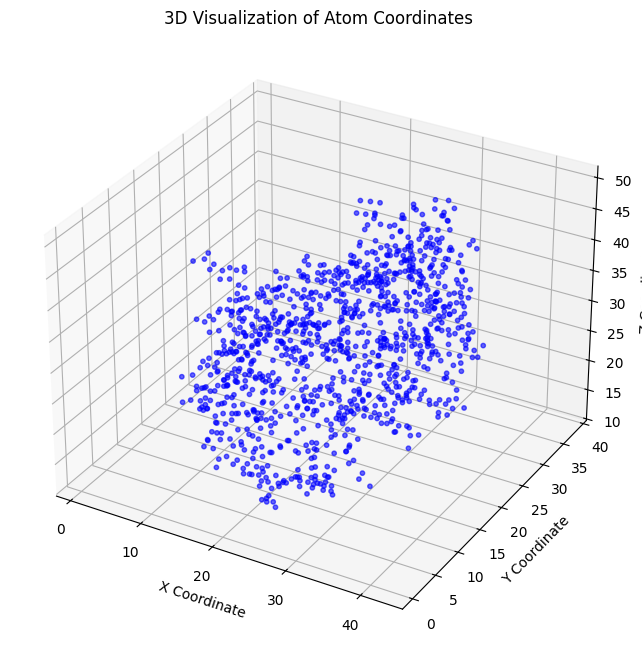

In [17]:
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

# 3D 시각화
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# x, y, z 좌표로 산점도 그리기
ax.scatter(group_A['x'], group_A['y'], group_A['z'], c='b', marker='o', s=10, alpha=0.6)

# 축 레이블 설정
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')

# 그래프 제목 설정
ax.set_title('3D Visualization of Atom Coordinates')

plt.show()

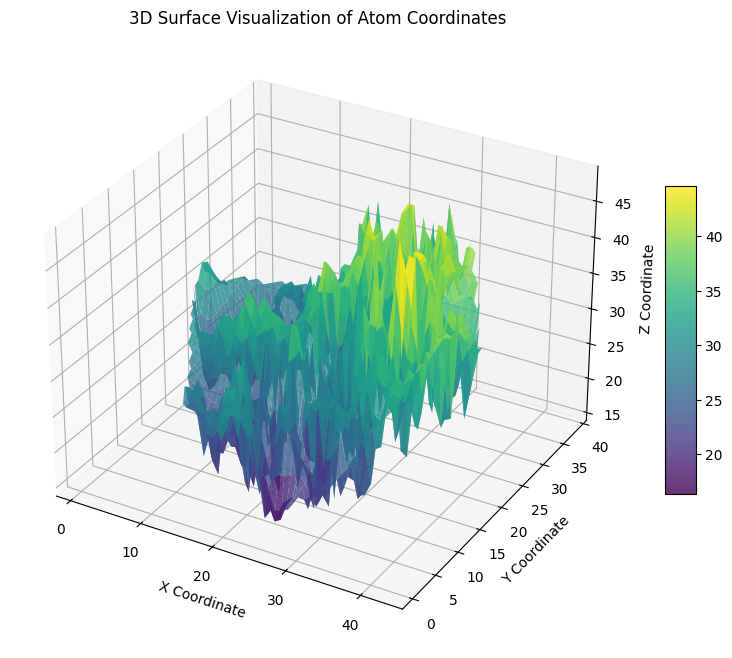

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import griddata

import matplotlib.pyplot as plt

# x, y, z 데이터를 격자로 변환
x = group_A['x'].values
y = group_A['y'].values
z = group_A['z'].values

# 격자 생성
x_grid, y_grid = np.meshgrid(
    np.linspace(x.min(), x.max(), 50),
    np.linspace(y.min(), y.max(), 50)
)

# z 값을 보간하여 격자에 맞춤
z_grid = griddata((x, y), z, (x_grid, y_grid), method='linear')

# 3D 표면 그래프 그리기
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 표면 플롯
surf = ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis', edgecolor='none', alpha=0.8)

# 축 레이블 설정
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')

# 컬러바 추가
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

# 그래프 제목 설정
ax.set_title('3D Surface Visualization of Atom Coordinates')

plt.show()

In [21]:
import plotly.express as px

# 3D 산점도 생성
fig = px.scatter_3d(group_A, x='x', y='y', z='z', color='res_name', title="3D Scatter Plot of group_A")
fig.update_layout(width=1200, height=800)
# 그래프 표시
fig.show()

In [61]:
import xml.etree.ElementTree as ET
import requests

# URL에서 직접 가져올 때
url  = "https://files.rcsb.org/download/6gh4.xml"
resp = requests.get(url)
resp.raise_for_status()
root = ET.fromstring(resp.content)

# 네임스페이스 정의
ns = {'PDBx': 'http://pdbml.pdb.org/schema/pdbx-v50.xsd'}

for atom in root.findall('.//PDBx:atom_site', ns):
    # 필수 항목
    atom_id   = atom.get('id', '')
    atom_name = atom.find('PDBx:auth_atom_id',   ns).text or ''
    res_name  = atom.find('PDBx:auth_comp_id',   ns).text or ''
    x         = atom.find('PDBx:Cartn_x',       ns).text or ''
    y         = atom.find('PDBx:Cartn_y',       ns).text or ''
    z         = atom.find('PDBx:Cartn_z',       ns).text or ''

    # 추가로 뽑아야 할 요소(element)들
    chain_elem   = atom.find('PDBx:auth_asym_id',    ns)
    res_no_elem  = atom.find('PDBx:auth_seq_id',     ns)
    entity_elem  = atom.find('PDBx:label_entity_id', ns)
    group_elem   = atom.find('PDBx:group_PDB',       ns)

    chain   = chain_elem.text  if chain_elem is not None else ''
    res_no  = res_no_elem.text if res_no_elem is not None else ''
    entity  = entity_elem.text if entity_elem is not None else ''
    group   = group_elem.text  if group_elem is not None else ''

    print(
        f'{atom_id:>4} | '
        f'Chain: {chain:1s} | '
        f'Res#: {res_no:>3s} | '
        f'Ent: {entity:>2s} | '
        f'{group:6s} | '
        f'{atom_name:4s} | '
        f'{res_name:3s} | '
        f'Coords=({x}, {y}, {z})'
    )


   1 | Chain: A | Res#:   1 | Ent:  1 | ATOM   | N    | GLY | Coords=(21.937, -1.432, 2.010)
   2 | Chain: A | Res#:   1 | Ent:  1 | ATOM   | CA   | GLY | Coords=(20.889, -2.346, 2.424)
   3 | Chain: A | Res#:   1 | Ent:  1 | ATOM   | C    | GLY | Coords=(20.228, -3.048, 1.255)
   4 | Chain: A | Res#:   1 | Ent:  1 | ATOM   | O    | GLY | Coords=(20.665, -2.909, 0.113)
   5 | Chain: A | Res#:   2 | Ent:  1 | ATOM   | N    | SER | Coords=(19.171, -3.802, 1.541)
   6 | Chain: A | Res#:   2 | Ent:  1 | ATOM   | CA   | SER | Coords=(18.458, -4.520, 0.498)
   7 | Chain: A | Res#:   2 | Ent:  1 | ATOM   | C    | SER | Coords=(17.488, -3.591, -0.221)
   8 | Chain: A | Res#:   2 | Ent:  1 | ATOM   | O    | SER | Coords=(17.003, -2.606, 0.342)
   9 | Chain: A | Res#:   2 | Ent:  1 | ATOM   | CB   | SER | Coords=(17.700, -5.708, 1.089)
  10 | Chain: A | Res#:   2 | Ent:  1 | ATOM   | OG   | SER | Coords=(18.592, -6.722, 1.519)
  11 | Chain: A | Res#:   3 | Ent:  1 | ATOM   | N    | HIS | Coords=

In [62]:
atom_id_list, atom_name_list, res_name_list, x_list, y_list, z_list = [], [], [], [], [], []
auth_asym_id_list, auth_seq_id_list, pdbx_PDB_model_num_list, label_entity_id_list = [], [], [], []
group_PDB_list = []

for atom_site in root.findall('.//PDBx:atom_site', ns):
    atom_id = int(atom_site.attrib.get('id'))
    atom_name = atom_site.find('PDBx:auth_atom_id', ns).text
    res_name = atom_site.find('PDBx:auth_comp_id', ns).text
    x = atom_site.find('PDBx:Cartn_x', ns).text
    y = atom_site.find('PDBx:Cartn_y', ns).text
    z = atom_site.find('PDBx:Cartn_z', ns).text
    

    auth_asym_id = atom_site.find('PDBx:auth_asym_id', ns).text
    auth_seq_id = int(atom_site.find('PDBx:auth_seq_id', ns).text)
    pdbx_PDB_model_num = int(atom_site.find('PDBx:pdbx_PDB_model_num', ns).text)
    label_entity_id = int(atom_site.find('PDBx:label_entity_id', ns).text)

    group_PDB = atom_site.find('PDBx:group_PDB', ns).text

    atom_id_list.append(atom_id)
    atom_name_list.append(atom_name)
    res_name_list.append(res_name)
    x_list.append(float(x))
    y_list.append(float(y))
    z_list.append(float(z))

    auth_asym_id_list.append(auth_asym_id)
    auth_seq_id_list.append(auth_seq_id)
    pdbx_PDB_model_num_list.append(pdbx_PDB_model_num)
    label_entity_id_list.append(label_entity_id)
    group_PDB_list.append(group_PDB)

# DataFrame 생성
df = pd.DataFrame({
    'atom_id': atom_id_list,
    'atom_name': atom_name_list,
    'res_name': res_name_list,
    'x': x_list,
    'y': y_list,
    'z': z_list,
    'auth_asym_id': auth_asym_id_list,
    'auth_seq_id': auth_seq_id_list,
    'pdbx_PDB_model_num': pdbx_PDB_model_num_list,
    'label_entity_id': label_entity_id_list,
    'group_PDB': group_PDB_list
})

df

,atom_id,atom_name,res_name,x,y,z,auth_asym_id,auth_seq_id,pdbx_PDB_model_num,label_entity_id,group_PDB
0,1,N,GLY,21.937,-1.432,2.010,A,1,1,1,ATOM
1,2,CA,GLY,20.889,-2.346,2.424,A,1,1,1,ATOM
2,3,C,GLY,20.228,-3.048,1.255,A,1,1,1,ATOM
3,4,O,GLY,20.665,-2.909,0.113,A,1,1,1,ATOM
4,5,N,SER,19.171,-3.802,1.541,A,2,1,1,ATOM
...,...,...,...,...,...,...,...,...,...,...,...
13591,13592,O,HOH,13.766,59.528,20.223,Y,101,1,6,HETATM
13592,13593,O,HOH,30.576,48.734,18.644,Y,102,1,6,HETATM
13593,13594,O,HOH,21.013,61.812,18.349,Y,103,1,6,HETATM
13594,13595,O,HOH,27.972,53.375,19.586,Y,104,1,6,HETATM


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13596 entries, 0 to 13595
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   atom_id             13596 non-null  int64  
 1   atom_name           13596 non-null  object 
 2   res_name            13596 non-null  object 
 3   x                   13596 non-null  float64
 4   y                   13596 non-null  float64
 5   z                   13596 non-null  float64
 6   auth_asym_id        13596 non-null  object 
 7   auth_seq_id         13596 non-null  int64  
 8   pdbx_PDB_model_num  13596 non-null  int64  
 9   label_entity_id     13596 non-null  int64  
 10  group_PDB           13596 non-null  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 1.1+ MB


In [64]:
atom_df = df[df['group_PDB'] == 'ATOM']
atom_df

,atom_id,atom_name,res_name,x,y,z,auth_asym_id,auth_seq_id,pdbx_PDB_model_num,label_entity_id,group_PDB
0,1,N,GLY,21.937,-1.432,2.010,A,1,1,1,ATOM
1,2,CA,GLY,20.889,-2.346,2.424,A,1,1,1,ATOM
2,3,C,GLY,20.228,-3.048,1.255,A,1,1,1,ATOM
3,4,O,GLY,20.665,-2.909,0.113,A,1,1,1,ATOM
4,5,N,SER,19.171,-3.802,1.541,A,2,1,1,ATOM
...,...,...,...,...,...,...,...,...,...,...,...
12539,12540,CB,LEU,15.392,60.250,15.920,Y,9,1,3,ATOM
12540,12541,CG,LEU,16.289,59.308,15.113,Y,9,1,3,ATOM
12541,12542,CD1,LEU,15.471,58.511,14.108,Y,9,1,3,ATOM
12542,12543,CD2,LEU,17.386,60.094,14.412,Y,9,1,3,ATOM


In [65]:
평가 = atom_df.groupby(atom_df['auth_asym_id'], as_index=False).agg({'auth_seq_id':'nunique'})
평가

,auth_asym_id,auth_seq_id
0,A,274
1,B,100
2,C,274
3,D,100
4,E,273
5,F,100
6,G,274
7,H,100
8,P,9
9,Q,9
